In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Buisness Understanding
- There is a big competition between Internet providers. If a providers want to increase its
  revenue they needs more subscriber but keep existing customer is more important than
  having new ones. So, providers want to know which customer should cancel his service. If
  the provider cancel the service, that is called churn.
- All industries suffer from voluntary churn -- the loss of customers to some other company.
  The survival of any business is based on its ability to retain customers. This is particularly
  true for phone, cable TV, satellite TV and wireless companies. How do you reduce churn?
  There are many ways: better products, better delivery methods, lower prices, building
  satisfactory customer relationships, better marketing and, above all, successful customer
  communications.
- Wireless companies today measure voluntary churn by a monthly figure, such as 1.9
  percent or 2.1 percent. This is the average number of customers who quit their service per
  month. Annual churn rates for telecommunications companies average between 10 percent
  and 67 percent.
- Industry retention surveys have shown that while price and product are important, most
  people leave any service because of dissatisfaction with the way they are treated. They
  would not be looking around if they were happy with their current provider, its service and
  employees.
- Churn reduction in the telecom industry is a serious problem, but there are many things that
  can be done to reduce it, and, with a customer database, many ways of measuring your
  success.


#### Data Explanation
- 1)   id: unique identifier
- 2)   is_tv_subscriber: customer  has a tv subscription ?
- 3)    is_movie_package_subscriber?
- 4)   subscription_age : how many year has the customer use our service
- 5)   bill_avg : last 3 months bill avg
- 6)   reamining_contract : how many year remaining for customer contract. If null; customer didn't have a
     contract. The customer who has a contract time have to use their service until contract end.if they
     canceled their service before contract time end they pay a penalty fare.
     Two ways in which a customer could be using the services. One through a time-bound contract
     which costs less and another through a normal monthly subscription which obviously costs more. So, 
     even if a person is not in a contract, he's still a user who's paying monthly fees.
- 7)   service_failure_count customer : call count to call center for service failure for last 3 months
- 8)   download_avg : last 3 months internet usage (GB)
- 9)   upload_avg last : 3 months upload avg (GB)
- 10) download_over_limit : most of customer has a download limit. if they reach this limit they have to pay for
      this. this column contain "limit over count" for last 9 months
- 11) churn : this is the target column. if 1 customer canceled his service

## Libraries and data importing

In [99]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('internet_service_churn.csv')

In [4]:
df.head(3)

,Unnamed: 0,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,0,15,yes,no,11.95,25,0.14,0,8.4,2.3,0,0
1,1,18,no,no,8.22,0,NaN,0,0.0,0.0,0,1
2,2,23,yes,no,8.91,16,0.00,0,13.7,0.9,0,1


# Cleaning and feature extraction

In [5]:
df.isna().sum() # Here we will drop nans from download_avg and upload_avg and will deal with nan values in remaining contract

Unnamed: 0                         0
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [6]:
df.dropna(subset=['download_avg', 'upload_avg'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   71893 non-null  int64  
 1   id                           71893 non-null  int64  
 2   is_tv_subscriber             71893 non-null  object 
 3   is_movie_package_subscriber  71893 non-null  object 
 4   subscription_age             71893 non-null  float64
 5   bill_avg                     71893 non-null  int64  
 6   reamining_contract           50375 non-null  float64
 7   service_failure_count        71893 non-null  int64  
 8   download_avg                 71893 non-null  float64
 9   upload_avg                   71893 non-null  float64
 10  download_over_limit          71893 non-null  int64  
 11  churn                        71893 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 7.1+ MB


- there are 2 object features, 4 float and 6 integer

In [8]:
# checking if id of users repeated so we can use it 
len(df.id.unique())

71893

- so it has the same length as our data so we can drop it without regreting ^_^

In [9]:
# Drop Unwanted data
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [10]:
# rename reamaining_contract to remaining_contract
df.rename(columns={'reamining_contract':'remaining_contract'}, inplace=True)

# creating new column from remaining contract showing if a user is in contract if he has a number and not in contract if it has nan value
df['has_contract'] = df['remaining_contract'].apply(lambda x: 0 if pd.isna(x) else 1)

# imputing nan values in remaining contract by zero 
df['remaining_contract'].replace(np.nan, 0, inplace=True)

In [161]:
df.to_csv('cleaned_data.csv',index=False)

# EDA (univariant Analysis)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71893 non-null  object 
 1   is_movie_package_subscriber  71893 non-null  object 
 2   subscription_age             71893 non-null  float64
 3   bill_avg                     71893 non-null  int64  
 4   remaining_contract           71893 non-null  float64
 5   service_failure_count        71893 non-null  int64  
 6   download_avg                 71893 non-null  float64
 7   upload_avg                   71893 non-null  float64
 8   download_over_limit          71893 non-null  int64  
 9   churn                        71893 non-null  int64  
 10  has_contract                 71893 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 6.6+ MB


### Shoiwing numerical columns distribution and descriptive statistcs

In [12]:
# displaying describtion of each numerical continous columns
df.select_dtypes(include='number').iloc[:, :-2].describe()

,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
count,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000
mean,2.455486,19.016844,0.497612,0.275674,43.689911,4.192076,0.208713
std,2.026856,13.188541,0.665755,0.818533,63.405963,9.818896,0.999647
min,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.940000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000
50%,1.980000,19.000000,0.000000,0.000000,27.800000,2.100000,0.000000
75%,3.300000,22.000000,1.030000,0.000000,60.500000,4.800000,0.000000
max,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000


###### Conclusion
- there is negative value in subscription age column that has to be deleted
- most of users subscription age lies in range 1 to 4
- bill avg has large maximum values we will consider them as they has a expensive bundle
- most of users has 0 remaining contract (means has no contract)
- there is a huge number of zero service_failure_count so we will see it it affect the target if not 
- upload and download avg has extreme values that may affect the target 
- few users had exceeded the limit of download

In [13]:
# we see above in subscription_age describtion it has value less than zero so we will drop it 
df.drop(df[df['subscription_age'] < 0].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

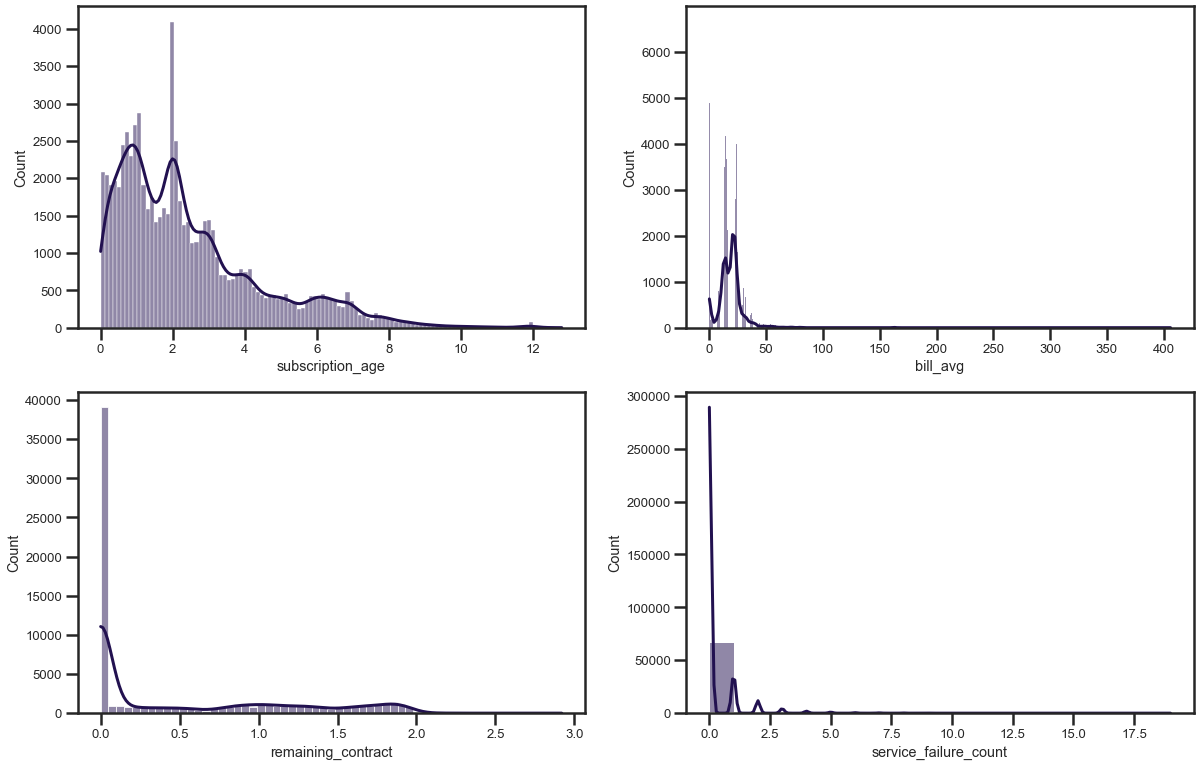

In [14]:
#plotting the scater plot for each column with target
sns.set_theme(context='poster', style = 'ticks', palette='magma', font_scale = 0.6, rc= {'figure.figsize':(20,13)})
fig, axs = plt.subplots(2, 2)
sns.histplot(x = df['subscription_age'],kde=True, ax=axs[0,0])
sns.histplot(x = df['bill_avg'],kde=True, ax=axs[0,1])
sns.histplot(x = df['remaining_contract'],kde=True, ax=axs[1,0])
sns.histplot(x = df['service_failure_count'],kde=True, ax=axs[1,1])

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

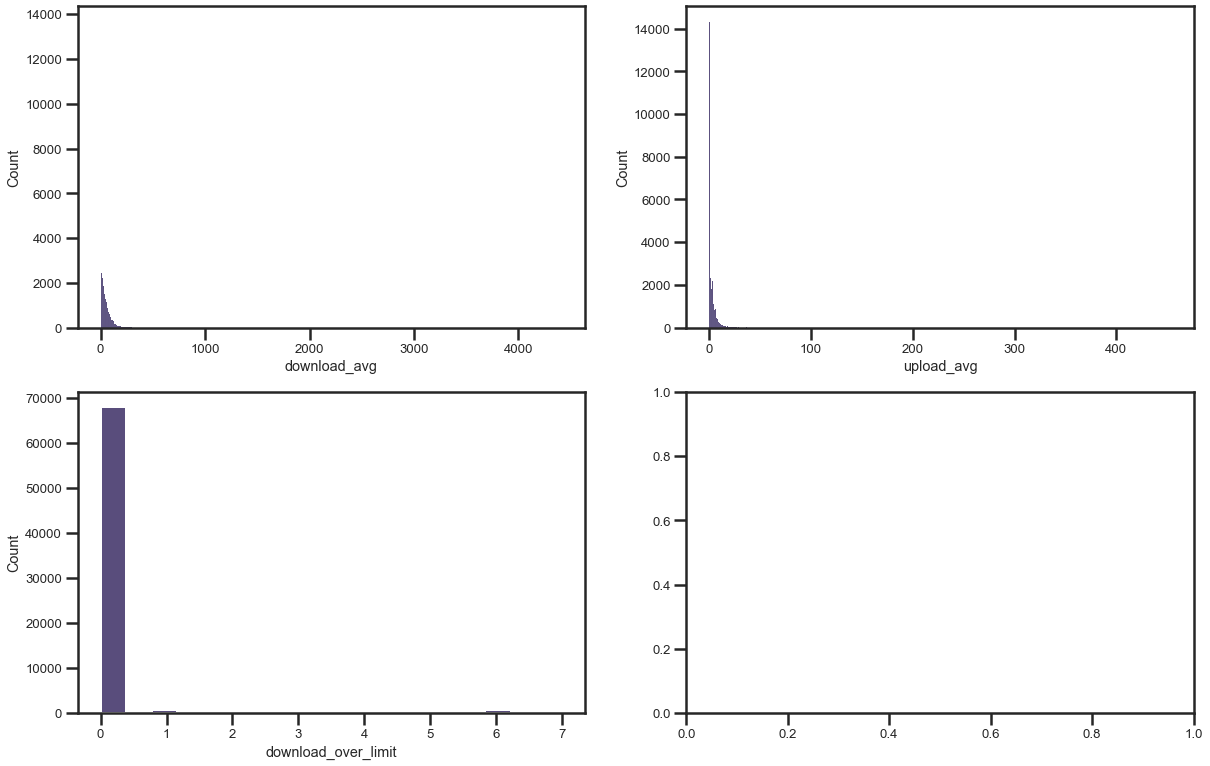

In [15]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=2, ncols=2, figsize=(20,13))


# First plot
a = sns.histplot(x = df['download_avg'],ax=my_grid[0,0])
# Second plot
a = sns.histplot(x = df['upload_avg'],ax=my_grid[0,1])

# third plot
a = sns.histplot(x = df['download_over_limit'],ax=my_grid[1,0])

plt.show()

## Checking out liers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

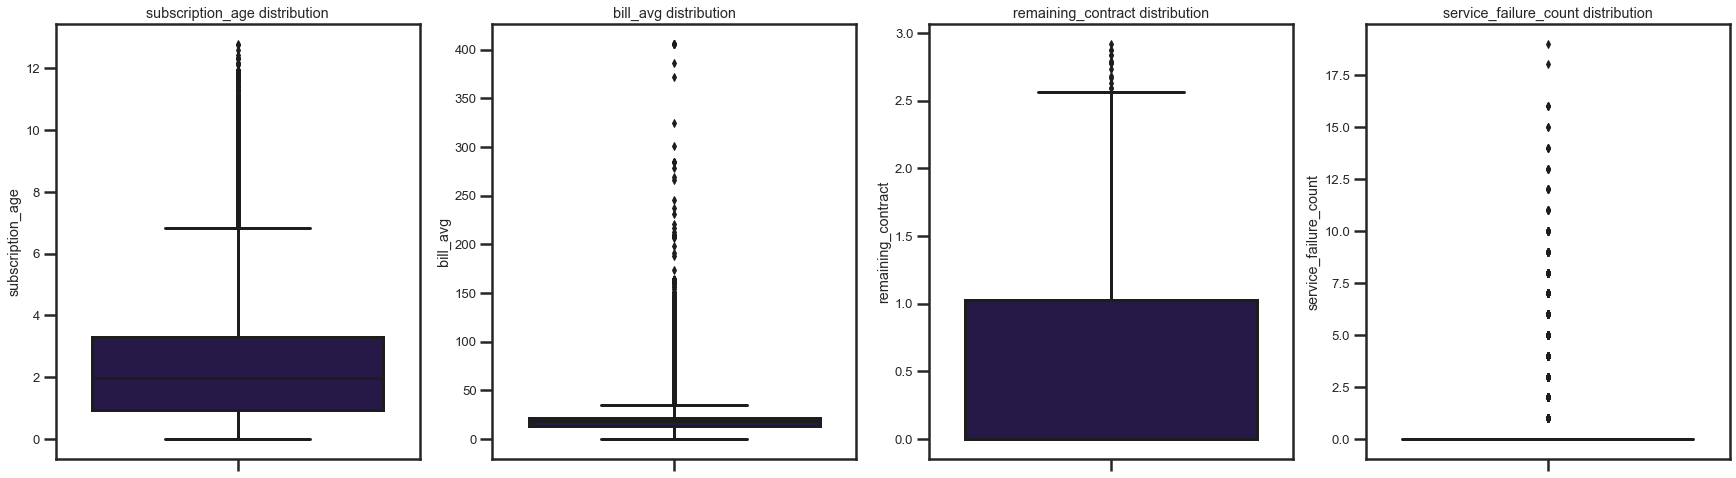

In [16]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=1, ncols=4, figsize=(30,8))


# First plot
a = sns.boxplot(y = df['subscription_age'],ax=my_grid[0])
a.set_title('subscription_age distribution')


# Second plot
a = sns.boxplot(y = df['bill_avg'],ax=my_grid[1])
a.set_title('bill_avg distribution')


# third plot
a = sns.boxplot(y = df['remaining_contract'],ax=my_grid[2])
a.set_title('remaining_contract distribution')


#4rth plot
a = a = sns.boxplot(y = df['service_failure_count'],ax=my_grid[3]) 
a.set_title('service_failure_count distribution')


plt.plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

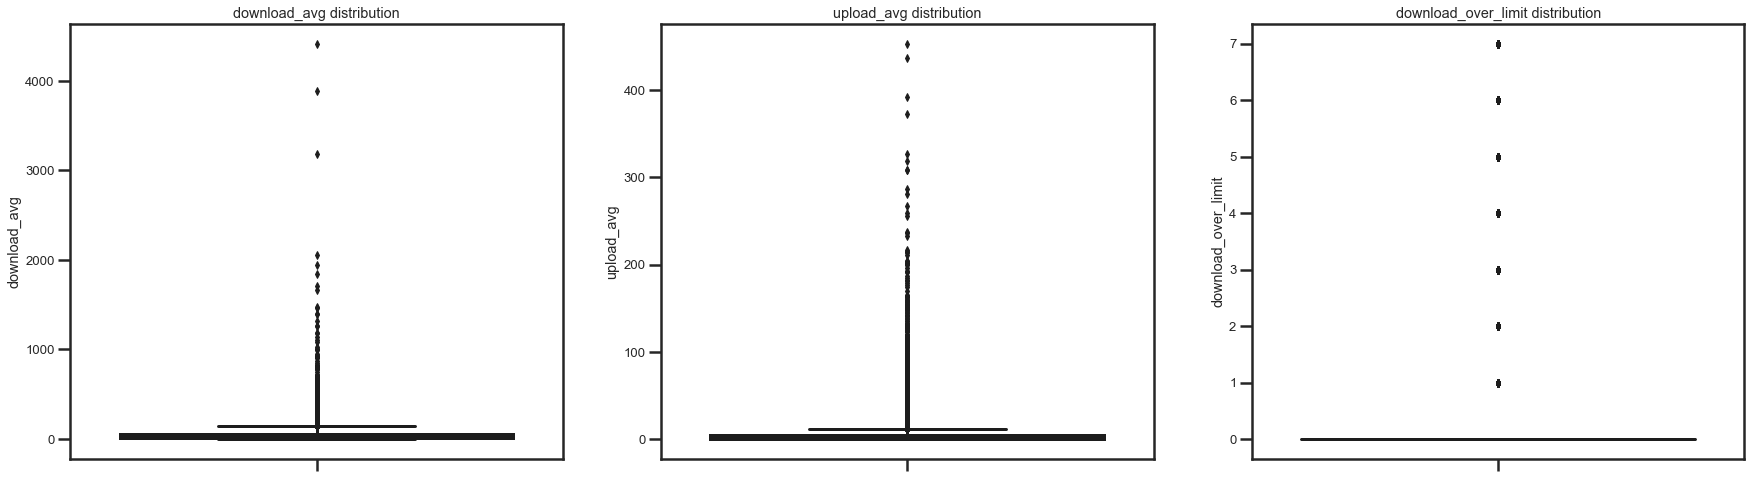

In [17]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=1, ncols=3, figsize=(30,8))


# First plot
a = sns.boxplot(y = df['download_avg'],ax=my_grid[0])
a.set_title('download_avg distribution')


# Second plot
a = sns.boxplot(y = df['upload_avg'],ax=my_grid[1])
a.set_title('upload_avg distribution')


# third plot
a = sns.boxplot(y = df['download_over_limit'],ax=my_grid[2])
a.set_title('download_over_limit distribution')



plt.plot()

## Categorical univariant

In [18]:
columns = ['is_tv_subscriber', 'is_movie_package_subscriber', 'churn', 'has_contract']

In [19]:
for col in columns:
    display(df[col].value_counts().to_frame().T)

,yes,no
is_tv_subscriber,58609,13283


,no,yes
is_movie_package_subscriber,47875,24017


,1,0
churn,40049,31843


,1,0
has_contract,50374,21518


- The count of people who have already churned is more. There is imbalance in the data with 40050 who has churned & 31843 who has not churned

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

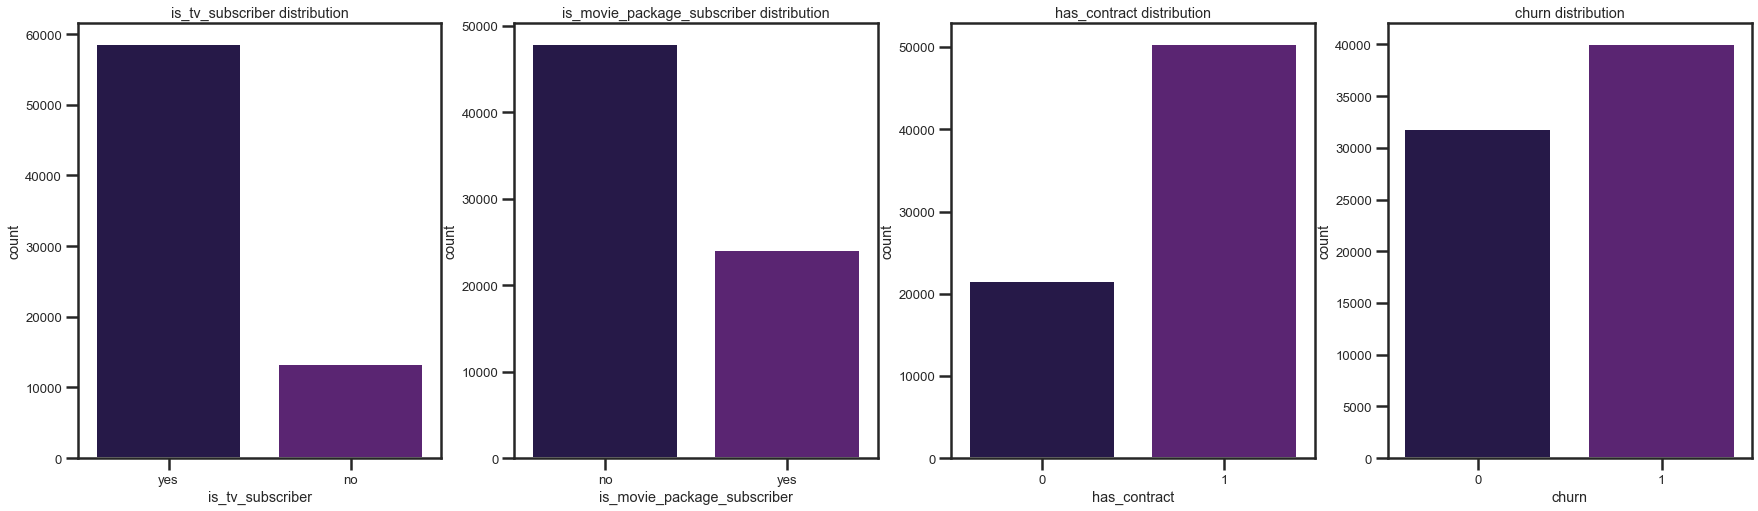

In [20]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=1, ncols=4, figsize=(30,8))


# First plot
a = sns.countplot(x = df['is_tv_subscriber'],ax=my_grid[0])
a.set_title('is_tv_subscriber distribution')


# Second plot
a = sns.countplot(x= df['is_movie_package_subscriber'],ax=my_grid[1])
a.set_title('is_movie_package_subscriber distribution')


# third plot
a = sns.countplot(x = df['has_contract'],ax=my_grid[2])
a.set_title('has_contract distribution')


#4rth plot
a = a = sns.countplot(x = df['churn'],ax=my_grid[3]) 
a.set_title('churn distribution')


plt.plot()

# Bi Variant Analysis and business questions

### How many users with tv and movie package subscription?

In [45]:
df.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts().to_frame()

is_movie_package_subscriber
is_tv_subscriber is_movie_package_subscriber                             
no               no                                                 13281
                 yes                                                    2
yes              no                                                 34594
                 yes                                                24015

- Customers with tv subscription are more compared to movie package subscribers.
- We can see only 2 customers opted for movie only package otherwise people who opted for movie package also has tv subscription.
- Customers who didn't opted for both tv & movie subscription include 13281.
-Customers who opted for both tv & movie include 24015.

<AxesSubplot:xlabel='is_tv_subscriber', ylabel='count'>

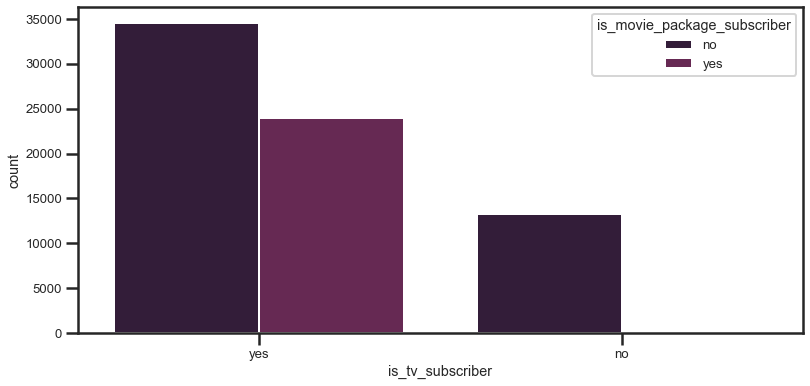

In [28]:
sns.set_theme(context='poster', style = 'ticks', palette='rocket', font_scale = 0.6, rc= {'figure.figsize':(13,6)})
sns.countplot(df['is_tv_subscriber'], hue=df['is_movie_package_subscriber'])

- obviously there is no (yes in the right because it counts only 2 )

## Is Tv subscribers causing churn?

In [26]:
df.groupby('churn')['is_tv_subscriber'].value_counts()

churn  is_tv_subscriber
0      yes                 30525
       no                   1318
1      yes                 28084
       no                  11965
Name: is_tv_subscriber, dtype: int64

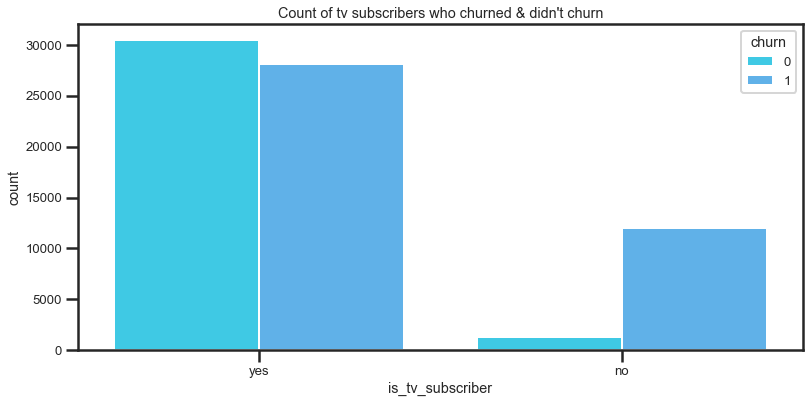

In [34]:
sns.set_theme(context='poster', style = 'ticks', palette='cool', font_scale = 0.6, rc= {'figure.figsize':(13,6)})
plt.title("Count of tv subscribers who churned & didn't churn")
sns.countplot(df['is_tv_subscriber'], hue=df['churn']);

- The customers who has subscribed to TV are the ones who has churned more. So, is_tv_subscriber is a important factor in prediction.

## Is movie subscribers causing churn?

In [44]:
df.groupby('churn')['is_movie_package_subscriber'].value_counts().to_frame()

is_movie_package_subscriber
churn is_movie_package_subscriber                             
0     no                                                 16021
      yes                                                15822
1     no                                                 31854
      yes                                                 8195

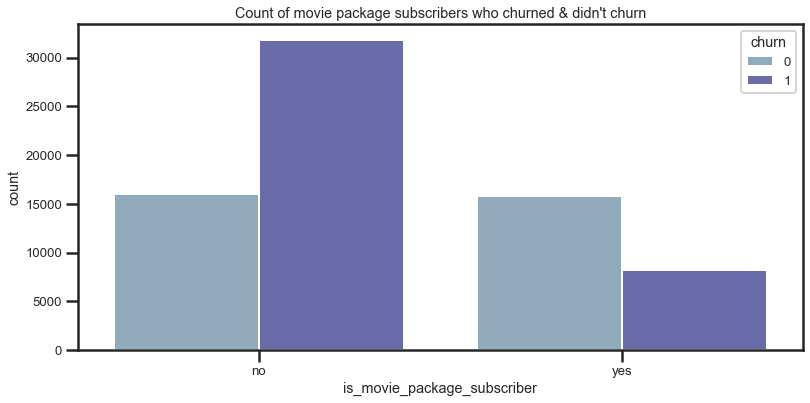

In [41]:
sns.set_theme(context='poster', style = 'ticks', palette='twilight', font_scale = 0.6, rc= {'figure.figsize':(13,6)})
plt.title("Count of movie package subscribers who churned & didn't churn")
sns.countplot(df['is_movie_package_subscriber'], hue=df['churn']);

- Movie package subscribers has lower churn rate & also customers who has opted for movie package are low. So, is_movie_package_subscriber cannot be considered an important factor in prediction.

## did movie and tv subscribers churn?

In [48]:
df.groupby(['is_movie_package_subscriber', 'is_tv_subscriber'])['churn'].sum().to_frame()

churn
is_movie_package_subscriber is_tv_subscriber       
no                          no                11963
                            yes               19891
yes                         no                    2
                            yes                8193

<AxesSubplot:xlabel='is_tv_subscriber', ylabel='churn'>

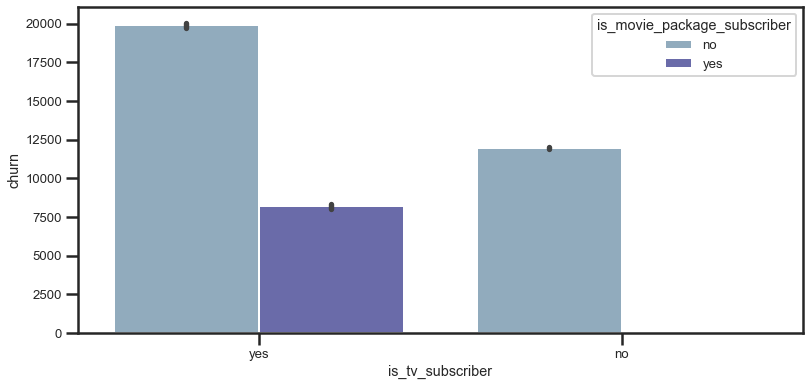

In [49]:
sns.barplot(data=df, x = 'is_tv_subscriber', y = 'churn', hue='is_movie_package_subscriber', estimator=sum)

- We can see that customers who have opted for both tv & movie subscription have less churn rate.
- Customers who do not have subscriptions & also customers with tv subscription only has higher churn rate.

## Do customers churn less with higher subscription years?

<AxesSubplot:xlabel='churn', ylabel='subscription_age'>

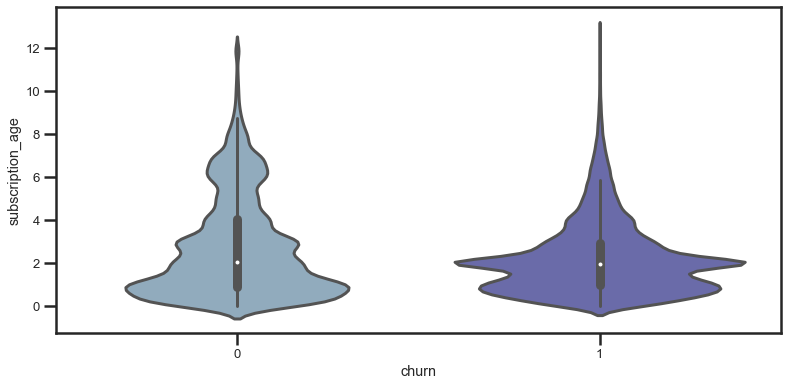

In [50]:
sns.violinplot(x = 'churn', y = 'subscription_age', data=df)

- We can see that the most of the customers who has not churned has subscription age lies between 1 to 4 years & there are some higher subscription age who has not churned.
- But for the customers who has churned subscription age lies between 1.5 to 3 years & there are exceptions with customers having high subscription age causing churn. Mostly, customers try to leave the service before 3 years.

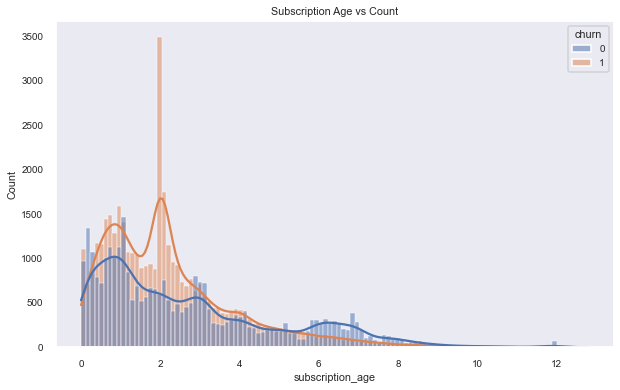

In [136]:
sns.set_theme(context='talk', style = 'dark',palette='deep', font_scale = 0.6, rc= {'figure.figsize':(15,6)})
plt.figure(figsize = (10,6))
sns.histplot(data = df, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

- Subscription age mostly lies in 0 to 4 years & customers with high subscription age are less. The churn rate is also higher in the 0 to 4 years subscription age. So, subscription_age is a important factor in churn prediction.

## Is the customers bill average caused effect on churn rate?

<AxesSubplot:xlabel='churn', ylabel='bill_avg'>

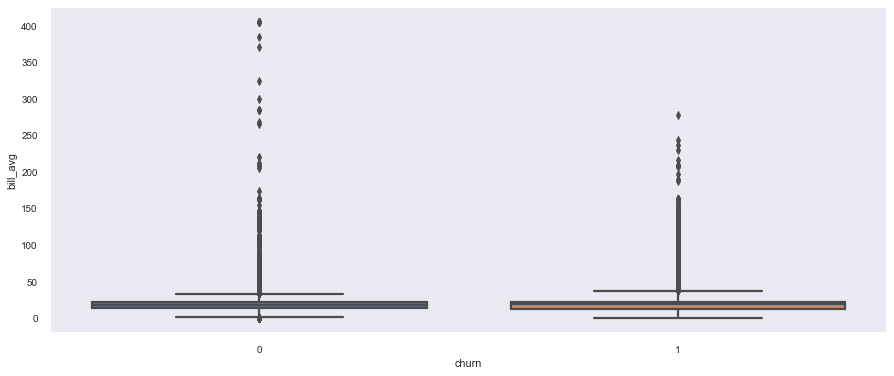

In [138]:
sns.boxplot(x= 'churn', y = 'bill_avg', data=df)

- Bill average most of it's values lies in between 10 to 40 dollars for customers who churn and who do not churn.
- There are exceptions with higher bill average customers being non - churner & also higher bill average customers being churners.

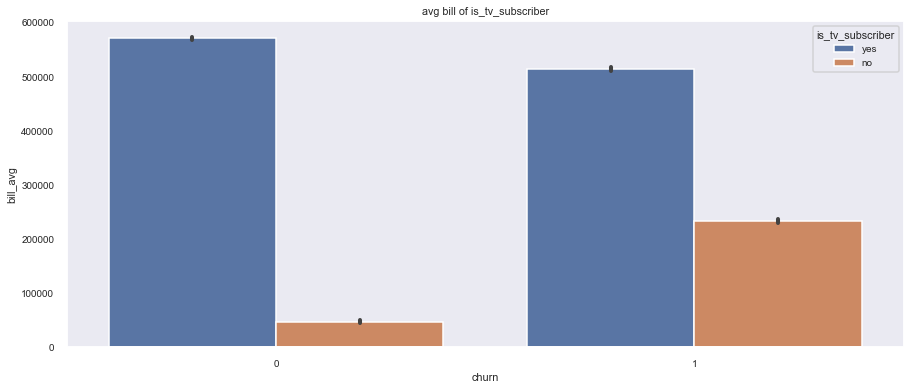

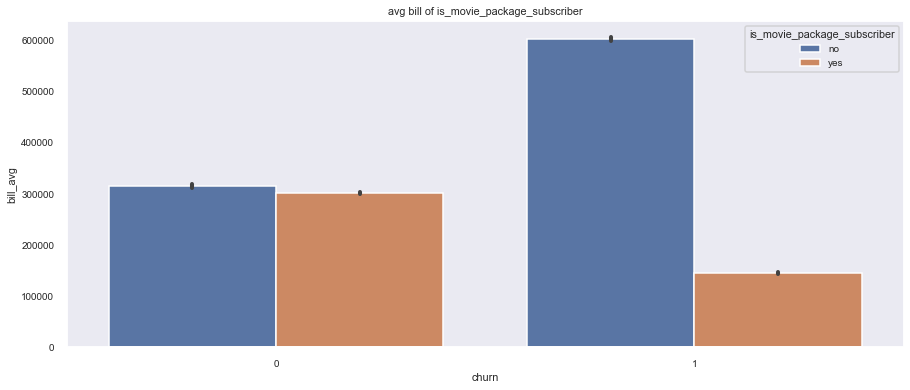

In [142]:
subscribers=["is_tv_subscriber","is_movie_package_subscriber"]
for i in subscribers:
    sns.barplot(x="churn",y="bill_avg",data=df,hue=i,estimator=sum)
    plt.title("avg bill of "+ i)
    plt.show()

In [141]:
df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['bill_avg', 'churn']].sum()

bill_avg  churn
is_tv_subscriber is_movie_package_subscriber                 
no               no                             280632  11963
                 yes                                28      2
yes              no                             639313  19891
                 yes                            447205   8193

- The customers who didn't have any subscription has lower average bill but still had a good amount of churn.¶
- The cusomers who only has tv subscription has higher average bill with highest churn rate.
- Customers with both subscription has the lowest churn rate.
- Thus, Bill average overall can be considered a factor which can cause the customer to churn

## Is remaining contract effects churn rate?

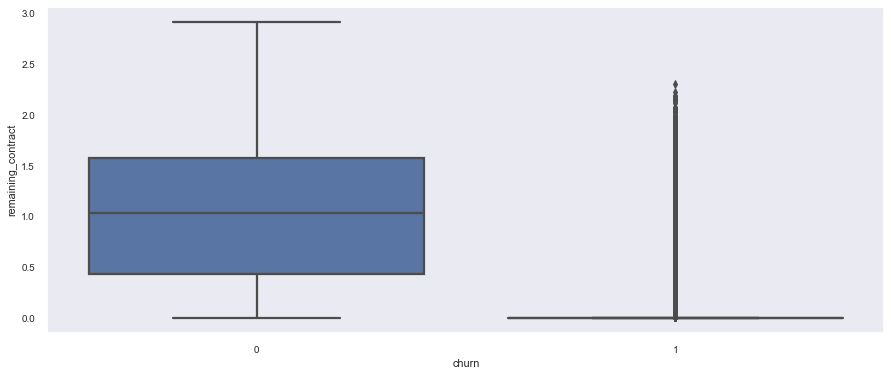

In [146]:
sns.boxplot(x="churn",y="remaining_contract",data=df)
plt.show() 

- We find that customers who have no contract are the ones who churn because if they cancel while in contract they have to pay penalty. There are exceptions with customers who had contract but still churned.
- Thus, remaining contract is a important factor in churn prediction.

## Does contract selection cause churn?

<AxesSubplot:xlabel='has_contract', ylabel='count'>

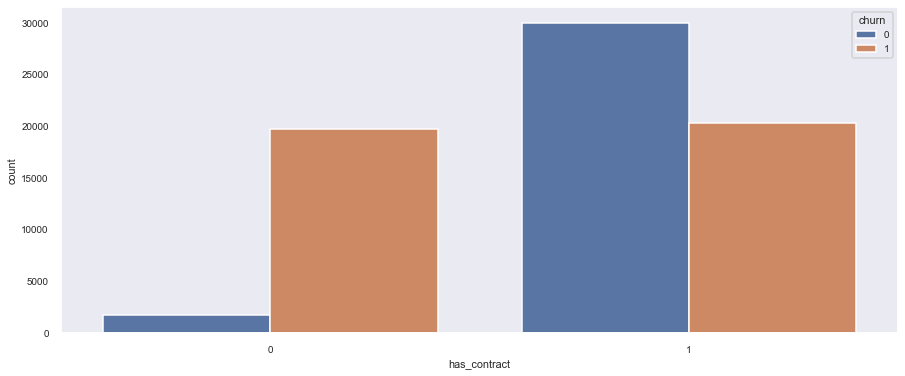

In [147]:
sns.countplot(x= 'has_contract', hue = 'churn', data = df)

In [151]:
df.groupby('has_contract')['churn'].sum().to_frame().T

has_contract,0,1
churn,19719,20330


- Customers opted for contract are more compared to non - contract. Churn is higher for people who do have contract's. This can be related to customers whose contracts are about to end or ended opting to churn.

## Do customers having service failure causing churn?

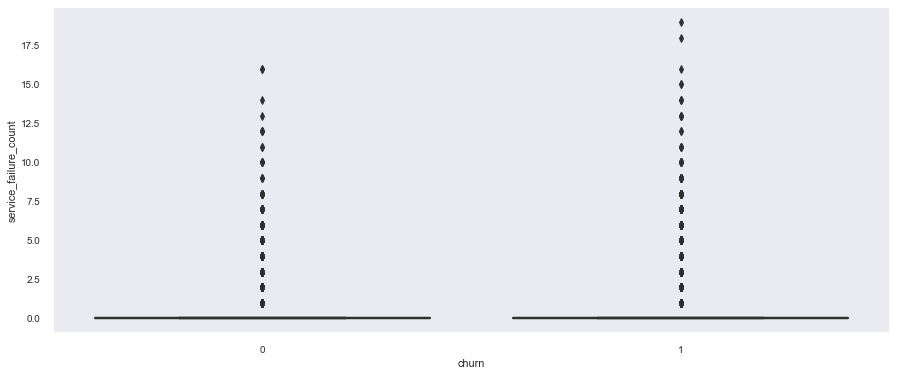

In [155]:
sns.boxplot(data= df, x = 'churn', y = 'service_failure_count', palette='magma');

- Customers with higher service failure calls have churned but we can also see the customer who also have high service failure calls has no churn.
- But overall if service failure counts do go high it can lead the customer to quit the service.

## Is download average of customers causing churn?

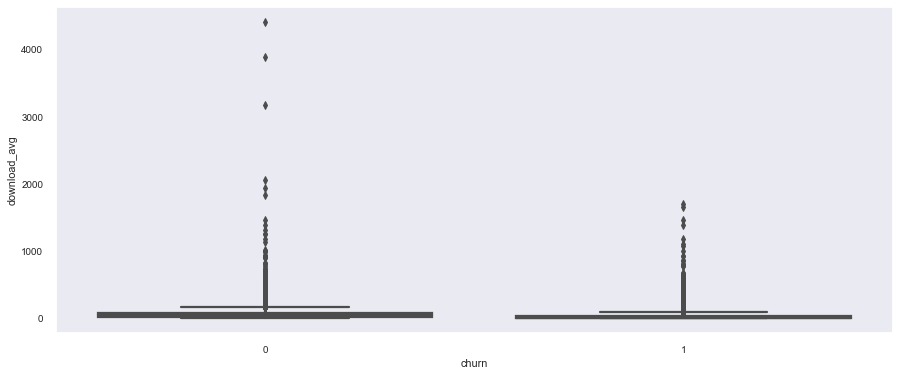

In [156]:
sns.boxplot(x="churn",y="download_avg",data=df);

- The download_average doesn't seem to be a factor in churn prediction.

## Is upload average of customers causing churn?

<AxesSubplot:xlabel='churn', ylabel='upload_avg'>

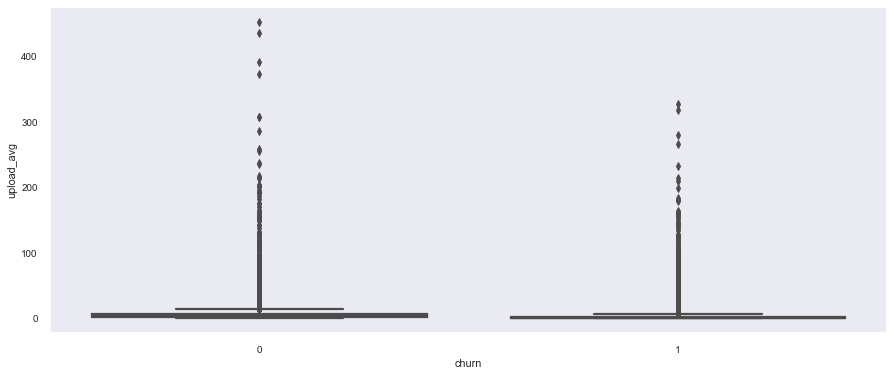

In [157]:
sns.boxplot(x = 'churn', y = 'upload_avg', data= df)

- The upload_average doesn't seem to be a factor in churn prediction.

In [159]:
df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['download_avg','upload_avg','churn']].agg(['sum'])

download_avg upload_avg  churn
                                                      sum        sum    sum
is_tv_subscriber is_movie_package_subscriber                               
no               no                              347347.5    37655.6  11963
                 yes                                 83.2        5.7      2
yes              no                             1399045.1   131995.1  19891
                 yes                            1394490.4   131723.2   8193

- The data shows the customers with tv subscription & both tv and movie subscription has the highest data usage.

## Is customers doing download over limit leading to churn?

<AxesSubplot:xlabel='churn', ylabel='download_over_limit'>

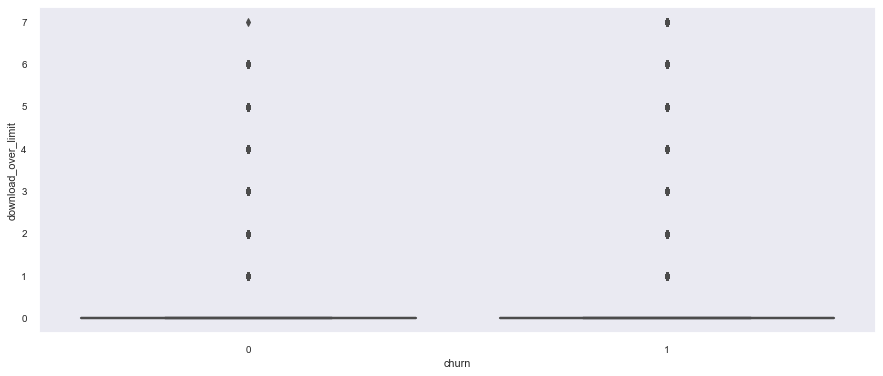

In [160]:
sns.boxplot(x = 'churn', y = 'download_over_limit', data = df)

- In reality, customers will be real careful about download over limit & also receive warnings if they reach the limit.¶
- Also, in the graph we cannot see relation between download over limit & churn.

### By Anas Awad ^_^